<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana12/ValidacionCruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI2025/Semana10')
!ls

Data				   MinimosGradiente.ipynb
EvolutivoLinearSystem.ipynb	   MinimosGradienteLevenberg–Marquardt.ipynb
Lagrange_Points.ipynb		   NewtonRaphson.ipynb
MinimosCuadradosMatriciales.ipynb


In [ ]:
data = np.loadtxt('Data/MinimosLineal.txt')
x_data, y_data = data[:, 0], data[:, 1]

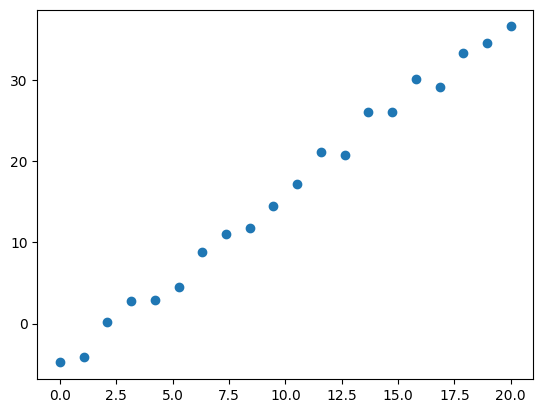

In [ ]:
plt.scatter(x_data, y_data)

In [ ]:
# Agregamos un eje para usar sklearn
X = x_data[:, None]
X

array([[ 0.      ],
       [ 1.052632],
       [ 2.105263],
       [ 3.157895],
       [ 4.210526],
       [ 5.263158],
       [ 6.315789],
       [ 7.368421],
       [ 8.421053],
       [ 9.473684],
       [10.52632 ],
       [11.57895 ],
       [12.63158 ],
       [13.68421 ],
       [14.73684 ],
       [15.78947 ],
       [16.84211 ],
       [17.89474 ],
       [18.94737 ],
       [20.      ]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

LinearRegression()
[2.12503681] -5.129185528852979
LinearRegression()
[ 2.22752179 -0.00512425] -5.4528223246434955
LinearRegression()
[ 1.7953049   0.05031048 -0.00184782] -4.8263022827406274
LinearRegression()
[ 1.98381538e+00  5.33525250e-03  1.70714639e-03 -8.88742675e-05] -4.971305776725661
LinearRegression()
[ 2.68602575e+00 -2.65424961e-01  3.90642067e-02 -2.21375326e-03
  4.24975801e-05] -5.275416686686295
[np.float64(1.747747863903682), np.float64(4.35254420531561), np.float64(3.8324957828239166), np.float64(2.1946040966721396), np.float64(37.2187779159256)]


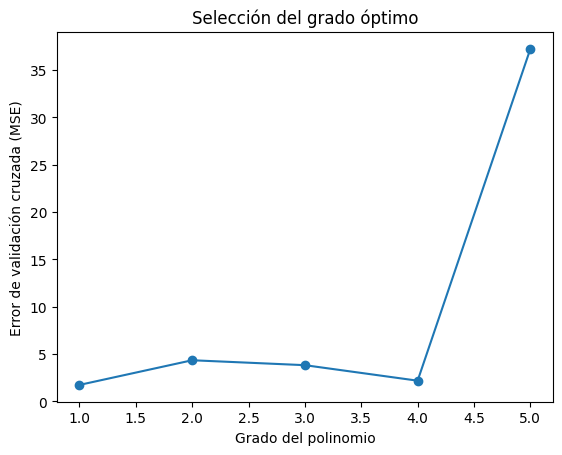

In [ ]:
# Probar grados 1 a 6
grados = range(1, 6)
mse_cv = []

for d in grados:
    poly = PolynomialFeatures(d)
    Xd = poly.fit_transform(X)
    model = LinearRegression()
    print(model.fit(Xd, y_data))
    print(model.coef_[1:],model.intercept_)
    scores = cross_val_score(model, Xd, y_data, cv=5, scoring='neg_mean_squared_error')
    mse_cv.append(-scores.mean())

print(mse_cv)

plt.plot(grados, mse_cv, 'o-')
plt.xlabel("Grado del polinomio")
plt.ylabel("Error de validación cruzada (MSE)")
plt.title("Selección del grado óptimo")
plt.show()